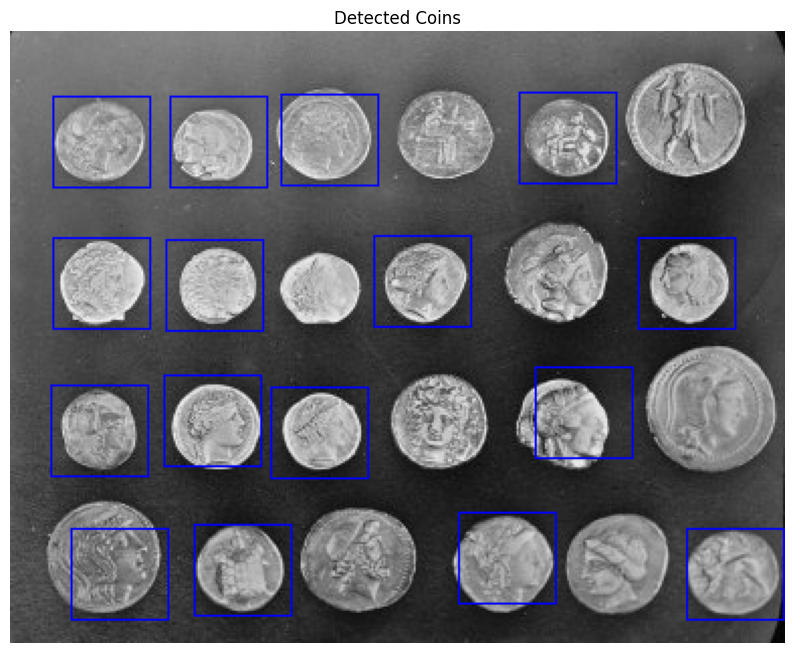

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)

# Function to select the region of interest (ROI) for the template
def select_template(image):
    r = cv2.selectROI("Select Template", image)
    template = image[int(r[1]):int(r[1] + r[3]), int(r[0]):int(r[0] + r[2])]
    cv2.destroyAllWindows()
    return template

# Select a coin as the template
template = select_template(image)

# Get the dimensions of the template
w, h = template.shape[::-1]

# Perform normalized cross-correlation
result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

# Define a threshold for detecting matches
threshold = 0.3
loc = np.where(result >= threshold)

# Collect bounding boxes for all detected matches
boxes = []
scores = []
for pt in zip(*loc[::-1]):
    boxes.append([pt[0], pt[1], pt[0] + w, pt[1] + h])
    scores.append(result[pt[1], pt[0]])

# Convert boxes and scores to numpy arrays
boxes = np.array(boxes)
scores = np.array(scores)

# Apply non-maximum suppression using cv2.dnn.NMSBoxes
overlapThresh = 0.3
indices = cv2.dnn.NMSBoxes(boxes.tolist(), scores.tolist(), threshold, overlapThresh)

# Create a copy of the image to draw matches
image_with_matches = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Draw rectangles around the filtered matches
if len(indices) > 0:
    for i in indices.flatten():
        box = boxes[i]
        cv2.rectangle(image_with_matches, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 1)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_matches, cv2.COLOR_BGR2RGB))
plt.title('Detected Coins')
plt.axis('off')
plt.show()
